# This notebook shows a simple usecase for quasar_unred. More information about each of the functions is provided in quasar_unred.py.

## The theory behind this method can be found in section 5 of "The FIRST-2MASS Red Quasar Survey" - Glikman et al
###### https://ui.adsabs.harvard.edu/abs/2007ApJ...667..673G/abstract

### This demo relies on the files qso_template.txt and ukfs1037p0236.final.dat

In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np

from quasar_unred import load_template, extinguish, fit_composite, find_ebv, mc_spec

## Load in the template data. If no parameters are provided, the template created by Glikman et al (2006) is used.

### if the template file is not in the working directory, just provide full path to the template file as an argument to load_template("path/to/qso_template.txt")

In [2]:
# if the qso_template.txt file is in the working directory: 
templateWave, templateFlux = load_template()

## Load in spectrum data. This process will vary based on how your data is stored but in the end you need to have a numpy array for both wavelength and flux. Wavelength should have units of Angstroms
### The redshift of the quasar must be known and set as z below. All calculations occur in the rest frame.

In [3]:
specData = np.loadtxt("SDSSJ0036-0113.dat")
wave = specData[:,0]
flux = specData[:,1]
error_array = specData[:,2] # note the error array is only needed for the optional mc_spec() function below.

#Adjust into rest frame
z = 0.294
wave /= (z+1)

#Remove values outside the range used by dust_extinction
for i in range(wave.size -1,-1,-1):
    if(wave[i] < 912 or wave[i] > 32000):
        wave = np.delete(wave,i)
        flux = np.delete(flux,i)

#Remove any non-existant data point
notNans = ~np.isnan(flux)
flux = flux[notNans]
wave = wave[notNans]
err = error_array[notNans] # note the error array is only needed for the optional mc_spec() function below.


## Find the scaling factor between the template and the input spectrum.

In [4]:
srat = fit_composite(templateWave, templateFlux, wave, flux)

## Use find_ebv to obtain results.

In [5]:
results = find_ebv(templateWave, templateFlux, wave, flux, srat)
ebv = results[0]
print("E(B-V) = ", round(ebv,3))

TypeError: find_ebv() missing 1 required positional argument: 'z'

## Results can be plotted.

In [14]:
fitted_curve = results[4]
fitted_wave = results[5]


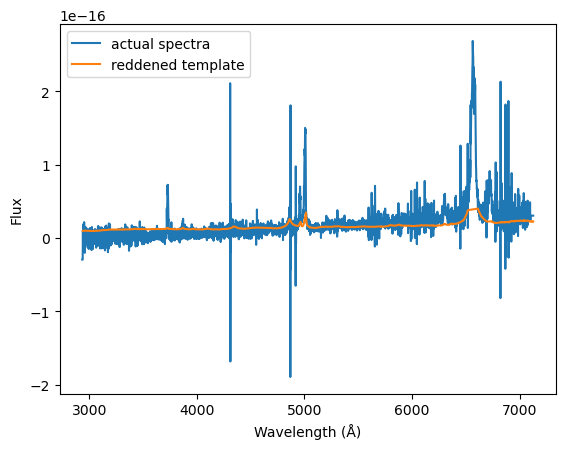

In [15]:
fig, ax = plt.subplots()
ax.plot(wave, flux, label = "actual spectra")
ax.plot(fitted_wave, fitted_curve, label = "reddened template")
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.show()

## If the spectrum has an error array, an uncertainty value can be obtained using random sampling
### The error is found by smoothing the spectrum with 29 pixel-width 1D Box and perturbing the smoothed spectrum using random sampling from the given error array. The synthetic, perturbed spectrum is then fit by reddened template as above. 
### This is repeated 1000 times (by default, to change add ntrials=new_value) as a parameter to mc_spec()

In [18]:
uncert = mc_spec(templateWave, templateFlux,  wave, flux, err, srat)

In [17]:
print("E(B-V) = ", ebv, " +/- ", uncert)

E(B-V) =  0.5760702945437705  +/-  0.02063049918481214
